In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [15]:
test = "../outputs/high_res.out"

In [16]:
output = pd.read_csv(test, sep=" ", header=None).drop(columns=3)
output.columns = ['r','theta','iso']
delta_g = 2 * np.pi / output.__len__()

output = output.append({
    "r": output.loc[0].r,
    "theta": (output.iloc[-1].name + 1) * delta_g,
    "iso": 500
},ignore_index = True)

res = list(output[['r','theta']].to_numpy())
xx = list(zip(res, res[1:]))
xx = list(map(list, xx))

/tmp/ipykernel_45190/3378712449.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({


In [17]:
plt.rcParams.update({'font.size': 13})

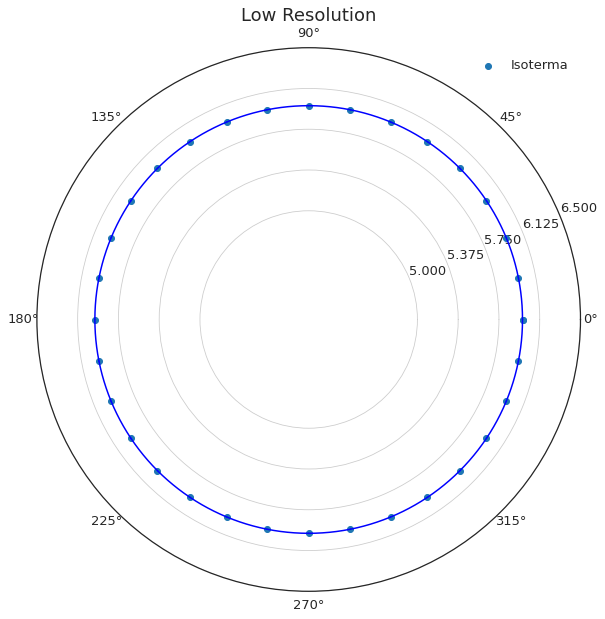

In [18]:
with plt.style.context("seaborn-white"):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection="polar")
    theta, r = output.theta, output.r
    ax.scatter(theta, r, label='Isoterma')
    
    # Connect two points with a curve
    for curve in xx:
        x = np.linspace(curve[0][1], curve[1][1], 500)
        
        p0 = (curve[0][1], curve[1][1])
        p1 = (curve[0][0], curve[1][0])
        
        y = interp1d(p0, p1)(x)
        ax.plot(x, y, color='b')
        
    ax.set_rorigin(4)
    ax.set_rticks(np.linspace(5, 6.5, 5))  # Less radial ticks
    plt.title("Low Resolution", fontsize=18)
    plt.legend()

plt.savefig("./plots/1_low_resolution.png")
# plt.show()
